In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


def load_and_preprocess(file):
    data = pd.read_csv(file)[["Year", "Month", "Flt"]]
    data["Flt"] = data["Flt"].str.replace(",", "")
    data["Flt"] = data["Flt"].astype("int")
    data["Month-Year"] = data["Month"].astype(str) + "-" + data["Year"].astype(str)
    data = data.set_index(["Month-Year"]).drop(["Month"], axis=1)
        
    return data

def create_k_lag_features(data, K):
    df = data.copy()
    for i in range(1,K+1):
        df[f"lag_{i}"] = df["Flt"].shift(i)
    
    df = df.dropna()
    return df

def split_train_test(data, train_start_year=2003, train_end_year=2019):

    if data is not None:
        # Splitting the data
        train_data = data[(data['Year'] >= train_start_year) & (data['Year'] <= train_end_year)].drop("Year", axis=1)
        test_data = data[(data['Year'] > train_end_year)].drop("Year", axis=1)
    else:
        print("Data not loaded. Call load_data and preprocess_data first")
        return None, None

    return train_data, test_data

def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [18]:
data_processed = load_and_preprocess("/workspace/unicamp/IA048/Exercise_Linear_Regression/data/air traffic.csv")

test_error = []
for K in range(1, 24):
        data_lag_features = create_k_lag_features(data_processed, K)
        train_data, test_data = split_train_test(data_lag_features)
        X_train = train_data.drop("Flt", axis=1)
        y_train = train_data["Flt"]
        X_test = test_data.drop("Flt", axis=1)
        y_test = test_data["Flt"]

        lin_reg = LinearRegression()
        lin_reg.fit(X_train, y_train)
        lin_reg.intercept_, lin_reg.coef_
        y_predict = lin_reg.predict(X_test)

        temp = {"K":K,
                "rmse":np.sqrt(mean_squared_error(y_test, y_predict))}

        test_error.append(temp)

In [23]:
test_error

[{'K': 1, 'rmse': 94353.03062595466},
 {'K': 2, 'rmse': 93095.59277440878},
 {'K': 3, 'rmse': 92901.0416302829},
 {'K': 4, 'rmse': 94444.91865993186},
 {'K': 5, 'rmse': 92690.05162332},
 {'K': 6, 'rmse': 94254.03139696592},
 {'K': 7, 'rmse': 95532.00286819611},
 {'K': 8, 'rmse': 109888.84024087619},
 {'K': 9, 'rmse': 134212.16817129258},
 {'K': 10, 'rmse': 130212.81051340468},
 {'K': 11, 'rmse': 129806.27849914765},
 {'K': 12, 'rmse': 139594.298410243},
 {'K': 13, 'rmse': 99134.10879357536},
 {'K': 14, 'rmse': 115719.37141006946},
 {'K': 15, 'rmse': 114537.87052834195},
 {'K': 16, 'rmse': 114428.69208978687},
 {'K': 17, 'rmse': 115914.33262371602},
 {'K': 18, 'rmse': 115936.41283241163},
 {'K': 19, 'rmse': 113748.02809082811},
 {'K': 20, 'rmse': 114421.48579492225},
 {'K': 21, 'rmse': 114423.11976256405},
 {'K': 22, 'rmse': 113066.21399161717},
 {'K': 23, 'rmse': 113893.01317291376}]

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X_train, y_train, X_test, y_test):
    train_errors, test_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

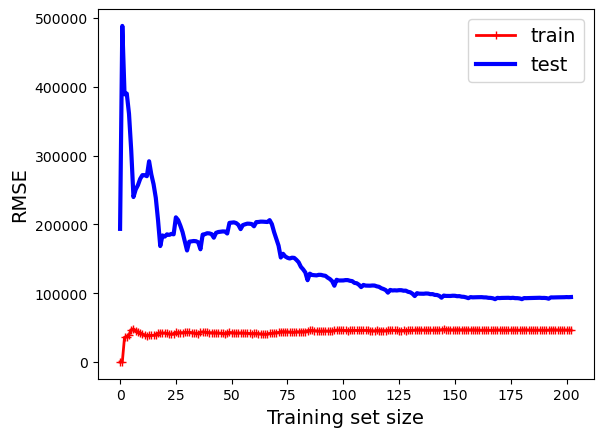

In [71]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X_train, y_train, X_test, y_test)